# Regression

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Генерация данных

In [12]:
np.random.seed(42)

x = np.random.gumbel(50, 10, 175)
y = x * 70000
noise = np.random.normal(0, 800000, 175)# + np.random.uniform(-500000, 500000, 875)
y = y + noise

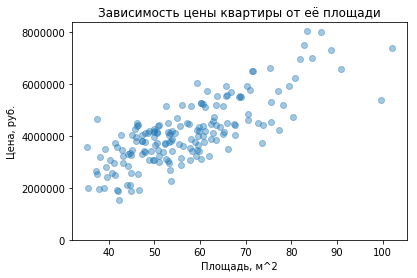

In [13]:
plt.plot(x, y, 'o', alpha=0.4)
plt.yticks(np.arange(0, 10000000, 2000000))
plt.xlabel('Площадь, м^2')
plt.ylabel('Цена, руб.')
plt.title('Зависимость цены квартиры от её площади')
plt.show()

## Net input

In [14]:
def net_input(W, X, b):
    assert len(W) == len(X), "len(W) != len(X)"
    result = 0
    for i in range(len(X)):
        result += W[i] * X[i]
    result += b
    return result

In [15]:
W = [1, 4, 5, 6]
b = 50
dumb_X = [3, 7, 8, 9]
dumb_Y = net_input(W, dumb_X, b)
dumb_Y

175

## Cost function

In [41]:
def cost_function(Y_hat, Y):
    return np.sum(np.square(Y_hat - Y)) / Y.shape[0]

## Cost function derivative

In [42]:
def cost_function_derivative_w(Y_hat, Y, X):
    return 2 * np.sum((Y_hat - Y) * X) / Y.shape[0]

In [43]:
def cost_function_derivative_b(Y_hat, Y):
    return 2 * np.sum(Y_hat - Y) / Y.shape[0]

In [92]:
W = np.array([0])
b = np.array([0])

LEARNING_RATE = 10e-7
NUM_ITERATIONS = 500

for i in range(0, NUM_ITERATIONS):
    #print('{} step'.format(i))
    y_hat = np.array([net_input(W, [x_single], b) for x_single in x])
    #print('cost function: ', cost_function(y_hat, y))
    #print('cost_function_derivative_w', cost_function_derivative_w(y_hat, y, x))
    W = W - LEARNING_RATE * cost_function_derivative_w(y_hat, y, x)
    b = b - LEARNING_RATE * cost_function_derivative_b(y_hat, y)
    
print(W)
print(b)

[76875.41169811]
[-36904.23776691]


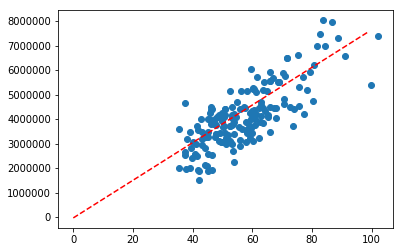

In [83]:
plt.plot(x, y, 'o')
plt.plot(np.arange(0, 100), np.arange(0, 100) * W + b, 'r--')
plt.show()

## Scikit-learn

In [84]:
from sklearn.linear_model import LinearRegression

In [86]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))

/Users/bsalyp/env_python/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
y_pred = model.predict(x.reshape(-1, 1))

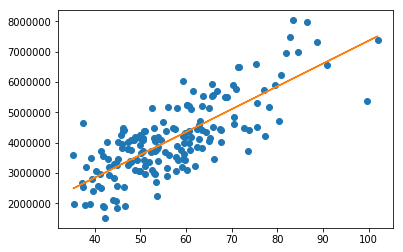

In [89]:
plt.plot(x, y, 'o')
plt.plot(x, y_pred)

In [90]:
model.coef_

array([[75227.26091521]])

In [91]:
model.intercept_

array([-161642.60465199])